<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/VGG_19SON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Anomaly localization in images using the global average pooling layer.
Binary classification - Good vs. bad images (control vs ms)
This code uses the multiple-sclerosis dataset
"""

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import glob
import os
from PIL import Image



import numpy as np
import glob
from sklearn.metrics import confusion_matrix , accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

In [ ]:
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Placeholders to define add labels. We will add 1 to all parasitized images and 0 to uninfected

In [ ]:
path = '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial/*'
for f in glob.iglob(path):
    img1=cv2.imread(f)
    img1 = Image.fromarray(img1, 'RGB')
    img1 = img1.resize((224, 224))
    dataset.append(np.array(img1))
    label.append(0)

In [ ]:
path = '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal/*'
for f in glob.iglob(path):
    img3=cv2.imread(f)
    img3 = Image.fromarray(img3, 'RGB')
    img3 = img3.resize((224, 224))
    dataset.append(np.array(img3))
    label.append(2)

In [ ]:
path = '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal/*'
for f in glob.iglob(path):
    img4=cv2.imread(f)
    img4 = Image.fromarray(img4, 'RGB')
    img4 = img4.resize((224, 224))
    dataset.append(np.array(img4))
    label.append(3)

In [ ]:
path = '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial/*'
for f in glob.iglob(path):
    img2=cv2.imread(f)
    img2 = Image.fromarray(img2, 'RGB')
    img2 = img2.resize((224, 224))
    dataset.append(np.array(img2))
    label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
#Split into train and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(dataset, label, test_size = 0.30, random_state = 0)

In [ ]:
X_train = X_train /255.
X_test = X_test /255.

In [ ]:
#Since we will be using categorical cross entropy loss, we need to convert our Y values to categorical.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import cv2
import timeit
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from keras import Model
import matplotlib.pyplot as plt
from keras.metrics import MeanIoU
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.layers import MaxPooling2D,BatchNormalization,Conv2D,Dense,Activation,Conv2DTranspose,Input
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D,Concatenate

from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import Image, display
# preprocessing and processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# ploting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
# split data
from sklearn.model_selection import train_test_split
# CNN
from keras import models, layers
# val
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




from tensorflow.keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./unet_model.h5', monitor = 'accuracy', save_best_only = True, verbose = 1)

vgg19 = keras.applications.vgg19
conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
x = keras.layers.Dense(132, activation='relu')(x)
predictions = keras.layers.Dense(4, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['accuracy'],)

history = full_model.fit(X_train, y_train, batch_size =32, epochs = 50, validation_data = (X_test, y_test),   workers=10, callbacks = [checkp])

80134624/80134624 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Epoch 1/50
75/75 [==============================] - ETA: 0s - loss: 0.7869 - accuracy: 0.7018
Epoch 1: accuracy improved from -inf to 0.70183, saving model to ./unet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 36s 339ms/step - loss: 0.7869 - accuracy: 0.7018 - val_loss: 0.7023 - val_accuracy: 0.7551
Epoch 2/50
75/75 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8328
Epoch 2: accuracy improved from 0.70183 to 0.83278, saving model to ./unet_model.h5
75/75 [==============================] - 16s 216ms/step - loss: 0.3870 - accuracy: 0.8328 - val_loss: 0.5308 - val_accuracy: 0.7959
Epoch 3/50
75/75 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8857
Epoch 3: accuracy improved from 0.83278 to 0.88574, saving model to ./unet_model.h5
75/75 [==============================] - 17s 224ms/step - loss: 0.2889 - accuracy: 0.8857 - val_loss: 0.3527 - val_accuracy: 0.9086
Epoch 4/50
75/75 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9008
Epoch 4: accuracy improved from 0.88574 to 0.90075, saving model to ./unet_model.h5
75/75 [==============================] - 17s 232ms/step - loss: 0.2441

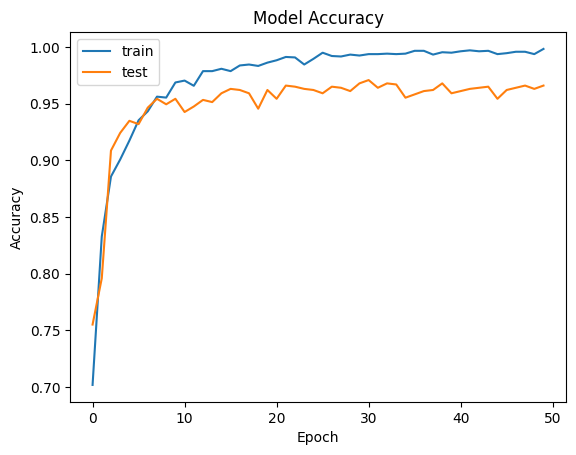

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'

if 'acc' in history.history :
    k = 'acc'

if k != '' :
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

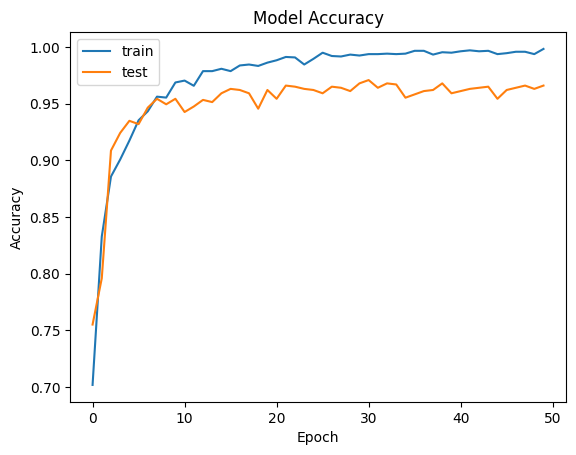

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'

if 'acc' in history.history :
    k = 'acc'

if k != '' :
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
full_model.save("finalunet.h5")

In [ ]:
y_pred = full_model.predict(X_test)

33/33 [==============================] - 5s 155ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
# print(classification_report(y_test, y_pred, target_names = info))
print(classification_report(y_test, y_pred))

Accuracy : 0.9659863945578231
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       320
           1       0.97      0.91      0.94       213
           2       0.97      1.00      0.98       295
           3       1.00      0.96      0.98       201

    accuracy                           0.97      1029
   macro avg       0.97      0.96      0.97      1029
weighted avg       0.97      0.97      0.97      1029



In [ ]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 192.72222222222217, 'Predicted')

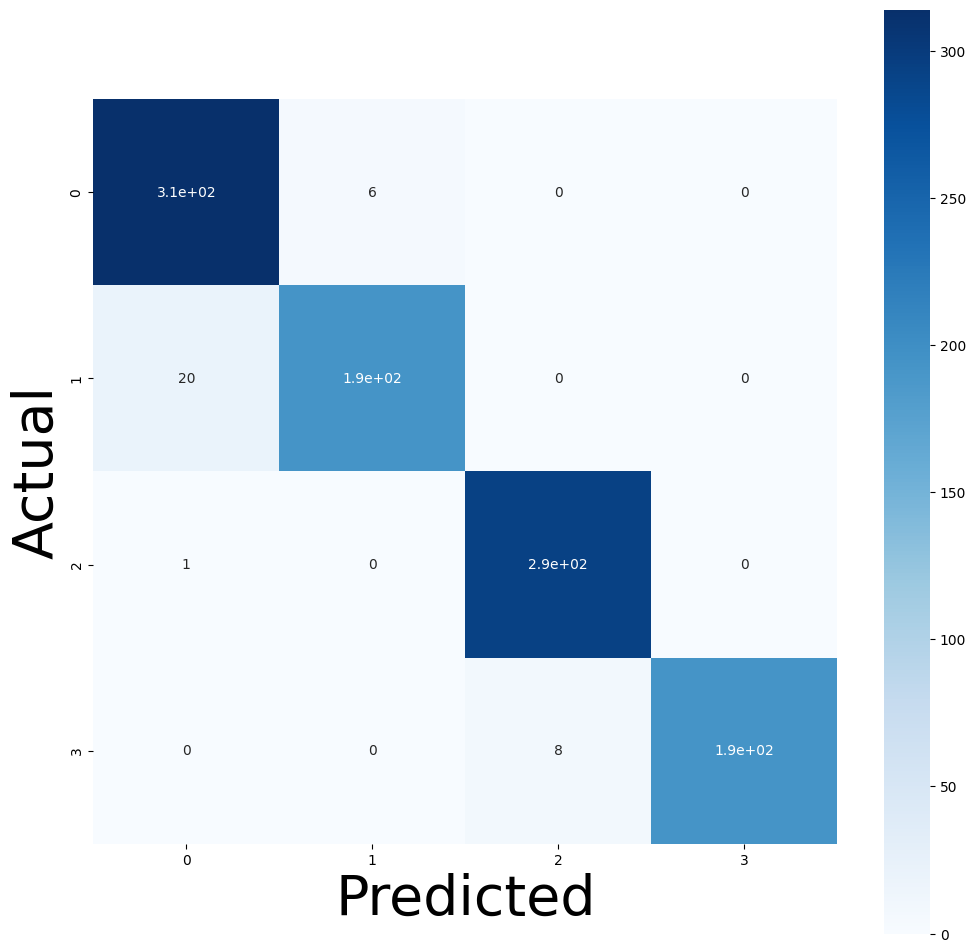

In [ ]:
import pandas
import seaborn
info=['0','1','2','3']
plt.figure(figsize = (12,12))
ax = seaborn.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)